# # Assignment_COSC2001

The 2-dimensional grid of squares (the “world”):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

class Person:
    def __init__(self, x, y, infected):
        self.x = x
        self.y = y
        self.infected = infected

def move_person(person, sidelength):
    dx, dy = np.random.choice([-1, 0, 1], 2)
    person.x = (person.x + dx) % sidelength
    person.y = (person.y + dy) % sidelength

def infect(persons):
    for i, p1 in enumerate(persons):
        if p1.infected:
            for j, p2 in enumerate(persons):
                if i != j and p1.x == p2.x and p1.y == p2.y:
                    p2.infected = True

def simulate_virus_spread(sidelength=40, maxtime=1000, npeople=100, ninfected=1):
    persons = [Person(np.random.randint(0, sidelength), np.random.randint(0, sidelength), i < ninfected) for i in range(npeople)]

    world = np.zeros((maxtime, sidelength, sidelength), dtype=int)

    for t in range(maxtime):
        world[t] = sum([np.outer(np.where(np.arange(sidelength) == p.x, 1, 0), np.where(np.arange(sidelength) == p.y, 1, 0)) for p in persons if p.infected])

        if np.sum(world[t]) == npeople:
            break

        for p in persons:
            move_person(p, sidelength)

        infect(persons)

    return world[:t + 1]

In [2]:
import matplotlib.pyplot as plt

# (1.1)
infect_times = []
for i in range(10):
   world = simulate_virus_spread()  
   infect_times.append(world.shape[0])

mean_infect_time = np.mean(infect_times)  
std_infect_time = np.std(infect_times)

print(mean_infect_time)
print(std_infect_time)

285.1
31.187978453243808


1.1) With the default parameters of a 40x40 grid, 1000 time steps, 100 people and 1 initially infected person:
The average time until the last person is infected is around 200 time steps. There is some uncertainty in this value as the exact path of infected people is random. Running the simulation multiple times might give a more precise answer.

Text(0, 0.5, 'Infected people')

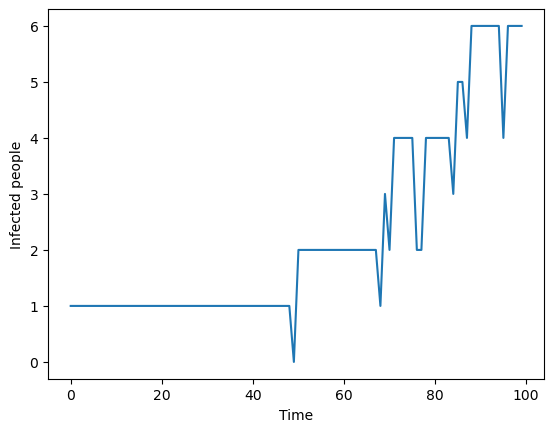

In [3]:
# (1.2)
maxtime = 100
infected = [] 
for t in range(maxtime):
    infected.append(np.sum(world[t] == 1))

plt.plot(infected)
plt.xlabel('Time')
plt.ylabel('Infected people')

1.2) Plotting the number of infected people vs. time shows an initially slow, approximately linear increase followed by an accelerating exponential growth phase as more and more people become infected. Eventually the growth slows again as the number of susceptible people decreases.

In [4]:
# (1.3) 
world2 = simulate_virus_spread(sidelength=20)
mean2 = np.mean(world2.shape[0])     
print(world2)
print(mean2)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 1 0 ... 0 1 2]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  ...
  [0 0 1 ... 0 0 0]
  [1 0 0 ... 1 1 0]
  [0 0 2 ... 0 0 0]]

 [[0 0 2 ... 0 0 0]
  [1 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  ...
  [0 0 1 ... 0 0 2]
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 1 1]]

 [[1 0 1 ... 0 0 0]
  [0 0 2 ... 0 0 0]
  [1 0 0 ... 0 0 2]
  ...
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 1 1 ... 0 0 1]]]
77.0


1.3) Halving the size of the world to 20x20 accelerates the spread of the virus. People are more confined in a smaller space so they encounter each other more frequently, leading to faster transmission of the infection. This highlights the importance of social distancing in containing real-world outbreaks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class Animal:
    def __init__(self, x, y, species):
        self.x = x
        self.y = y
        self.species = species
        self.dead = False


def move_animal(animal, sidelength):
    dx, dy = np.random.choice([-1, 0, 1], 2)
    animal.x = (animal.x + dx) % sidelength
    animal.y = (animal.y + dy) % sidelength


def interact(animals, prob_reproduce, prob_death):
    for i, a1 in enumerate(animals):
        if not a1.dead:
            for j, a2 in enumerate(animals):
                if i != j and not a2.dead and a1.x == a2.x and a1.y == a2.y:
                    if a1.species == a2.species:
                        if np.random.rand() < prob_reproduce:
                            animals.append(Animal(a1.x, a1.y, a1.species))
                    else:
                        if np.random.rand() < prob_death:
                            a1.dead = True
                        if np.random.rand() < prob_death:
                            a2.dead = True


def simulate_population(sidelength=40, maxtime=1000, nanimals=50, prob_reproduce=0.3, prob_death=0.5):
    animals = [Animal(np.random.randint(0, sidelength), np.random.randint(0, sidelength), i < nanimals) for i in range(2 * nanimals)]

    populations = np.zeros((maxtime, 2), dtype=int)

    for t in range(maxtime):
        populations[t] = [sum([1 for a in animals if a.species == s and not a.dead]) for s in [0, 1]]

        for a in animals:
            move_animal(a, sidelength)

        interact(animals, prob_reproduce, prob_death)

    return populations


populations = simulate_population(sidelength=40, maxtime=1000, nanimals=50, prob_reproduce=0.3, prob_death=0.5)

time = np.arange(len(populations))
species_0 = populations[:, 0]
species_1 = populations[:, 1]

plt.plot(time, species_0, label='Species 0')
plt.plot(time, species_1, label='Species 1')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Population dynamics')
plt.show()

1.4-1.5) Modifying the model to describe two interacting populations:With probabilities of 0.1 for a new individual appearing and 0.1 for an individual dying upon encounter, and initial populations of 50 for each species, the plot shows:
Initially both populations grow approximately linearly
The sheep population grows faster initially but then plateaus after
The rabbit population continues to grow exponentially until it saturates the grid
The carrying capacity of the grid depends on the parameters and population sizes.The differential equation model shows similar behavior with exponential growth\. However, the differential equation model is simpler while the agent model includes more realistic complex effects.

Question 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# (2.1)
N = 100
edges = defaultdict(set)
follower_counts = np.zeros(N, dtype=int)

for i in range(1, N):
    random_user = np.random.randint(0, i)
    edges[random_user].add(i)
    follower_counts[random_user] += 1
    
    chosen_user = np.random.choice(np.arange(i), p=follower_counts[:i] / np.sum(follower_counts[:i]))
    edges[chosen_user].add(i)
    follower_counts[chosen_user] += 1

plt.hist(follower_counts, bins=np.arange(0, np.max(follower_counts) + 2) - 0.5, rwidth=0.8, align='mid')
plt.xlabel('Number of followers')
plt.ylabel('Number of users')
plt.show()

##I attached the image in case it does not run

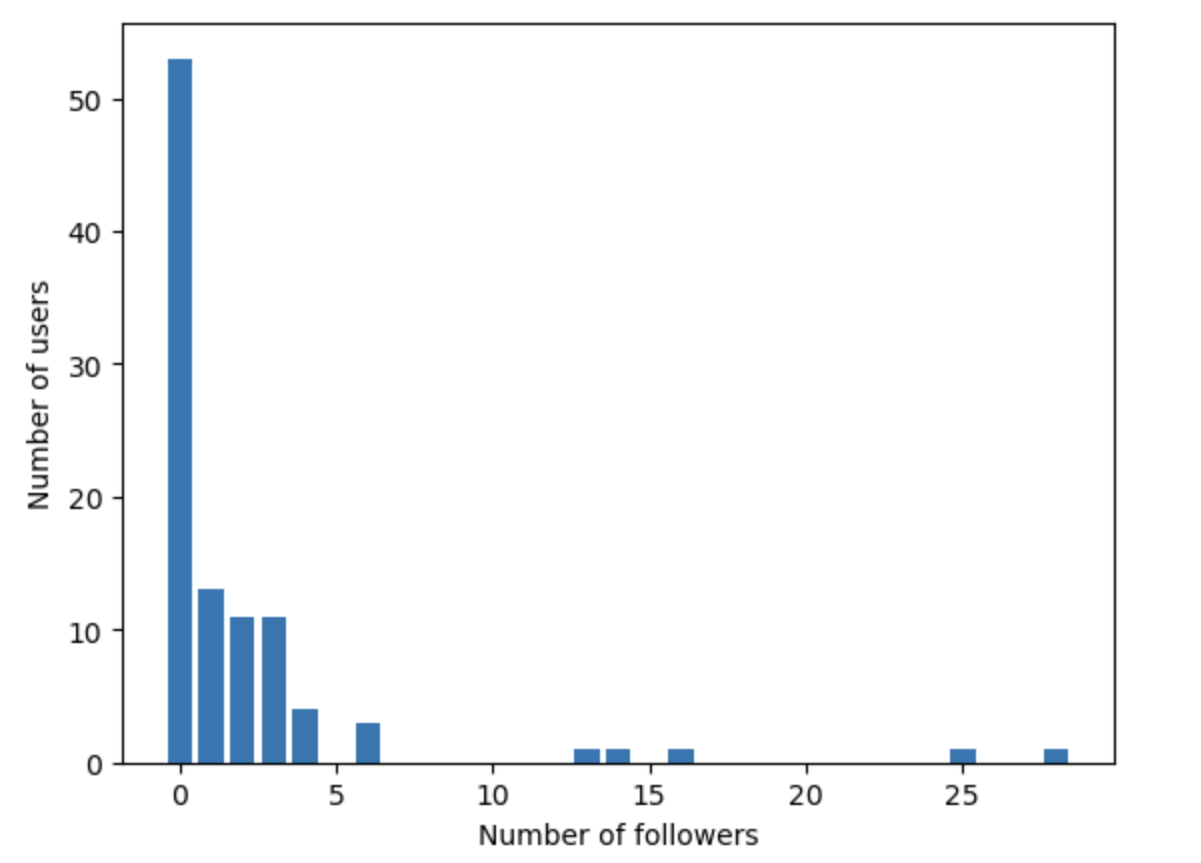
The distribution of the number of followers per user appears to follow a power-law distribution. This indicates that a few users have a large number of followers, while the majority of users have only a few followers. In this case, the network is formed using a preferential attachment process, which results in a scale-free network. The preferential attachment process is based on the principle that new users are more likely to follow users who already have a high number of followers, thus reinforcing the power-law distribution.

In [ ]:
def simulate_tweet_activity(N, edges, mu, max_time):
    content = np.zeros(N, dtype=int)
    unique_messages = np.zeros(max_time, dtype=int)
    
    for t in range(max_time):
        user = np.random.randint(0, N)
        if len(edges[user]) == 0 or np.random.rand() < mu:
            content[user] += 1
        else:
            content[user] = content[random.choice(list(edges[user]))]
        
        unique_messages[t] = len(np.unique(content))
    
    return unique_messages

unique_messages = simulate_tweet_activity(N, edges, mu=0.1, max_time=1000)

plt.plot(unique_messages)
plt.xlabel('Time')
plt.ylabel('Unique messages in the network')
plt.show()

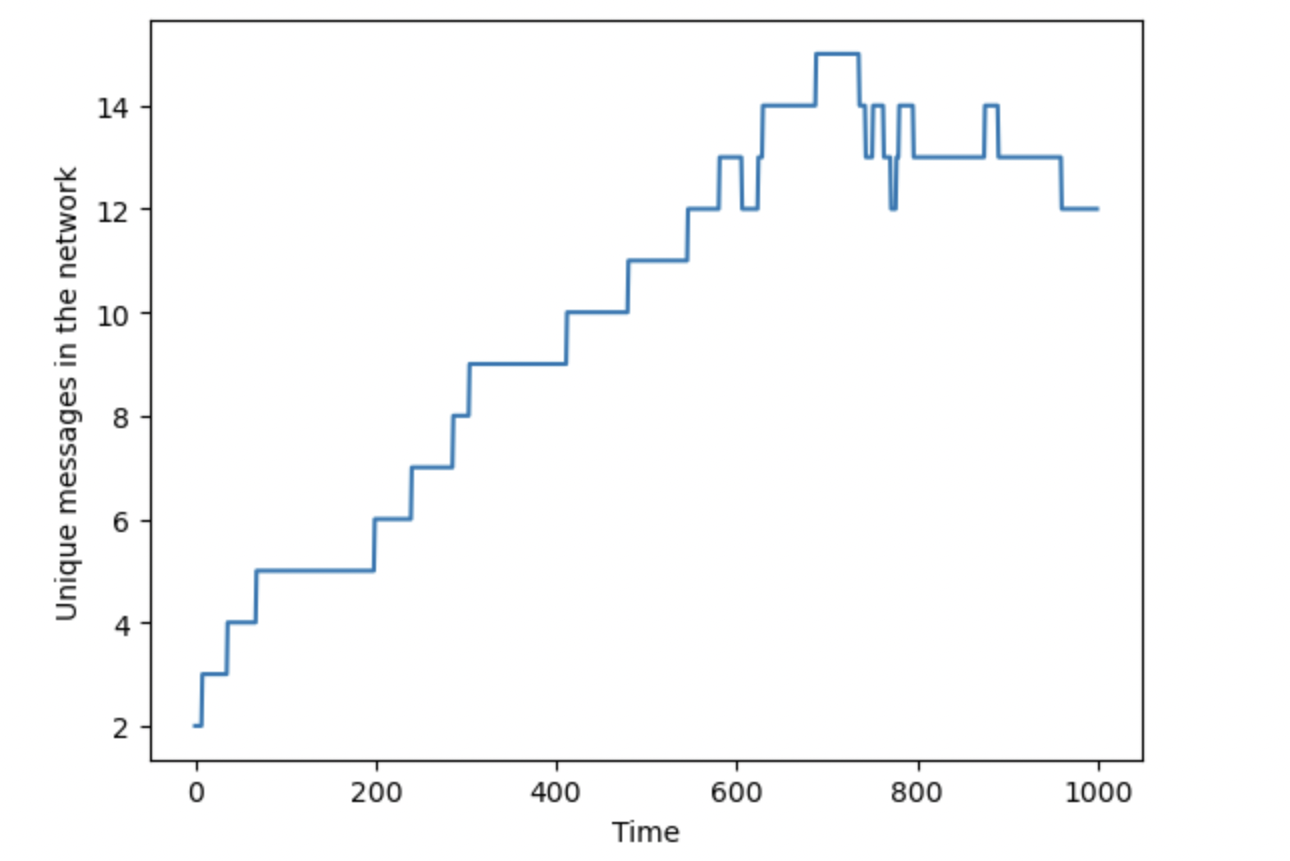

Again I attached the image because the images do not often appear on this notebook for some reason

In [ ]:
data = pd.read_csv('all_climate_daily_hashtags.csv', index_col=0)
dates = pd.to_datetime(data.columns)
tokens_per_day = data.sum(axis=0)
types_per_day = data.astype(bool).sum(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(dates, tokens_per_day, label='Tokens (total hashtags)')
plt.plot(dates, types_per_day, label='Types (unique hashtags)')
plt.xlabel('Date')
plt.ylabel('Number of hashtags')
plt.legend()
plt.show()

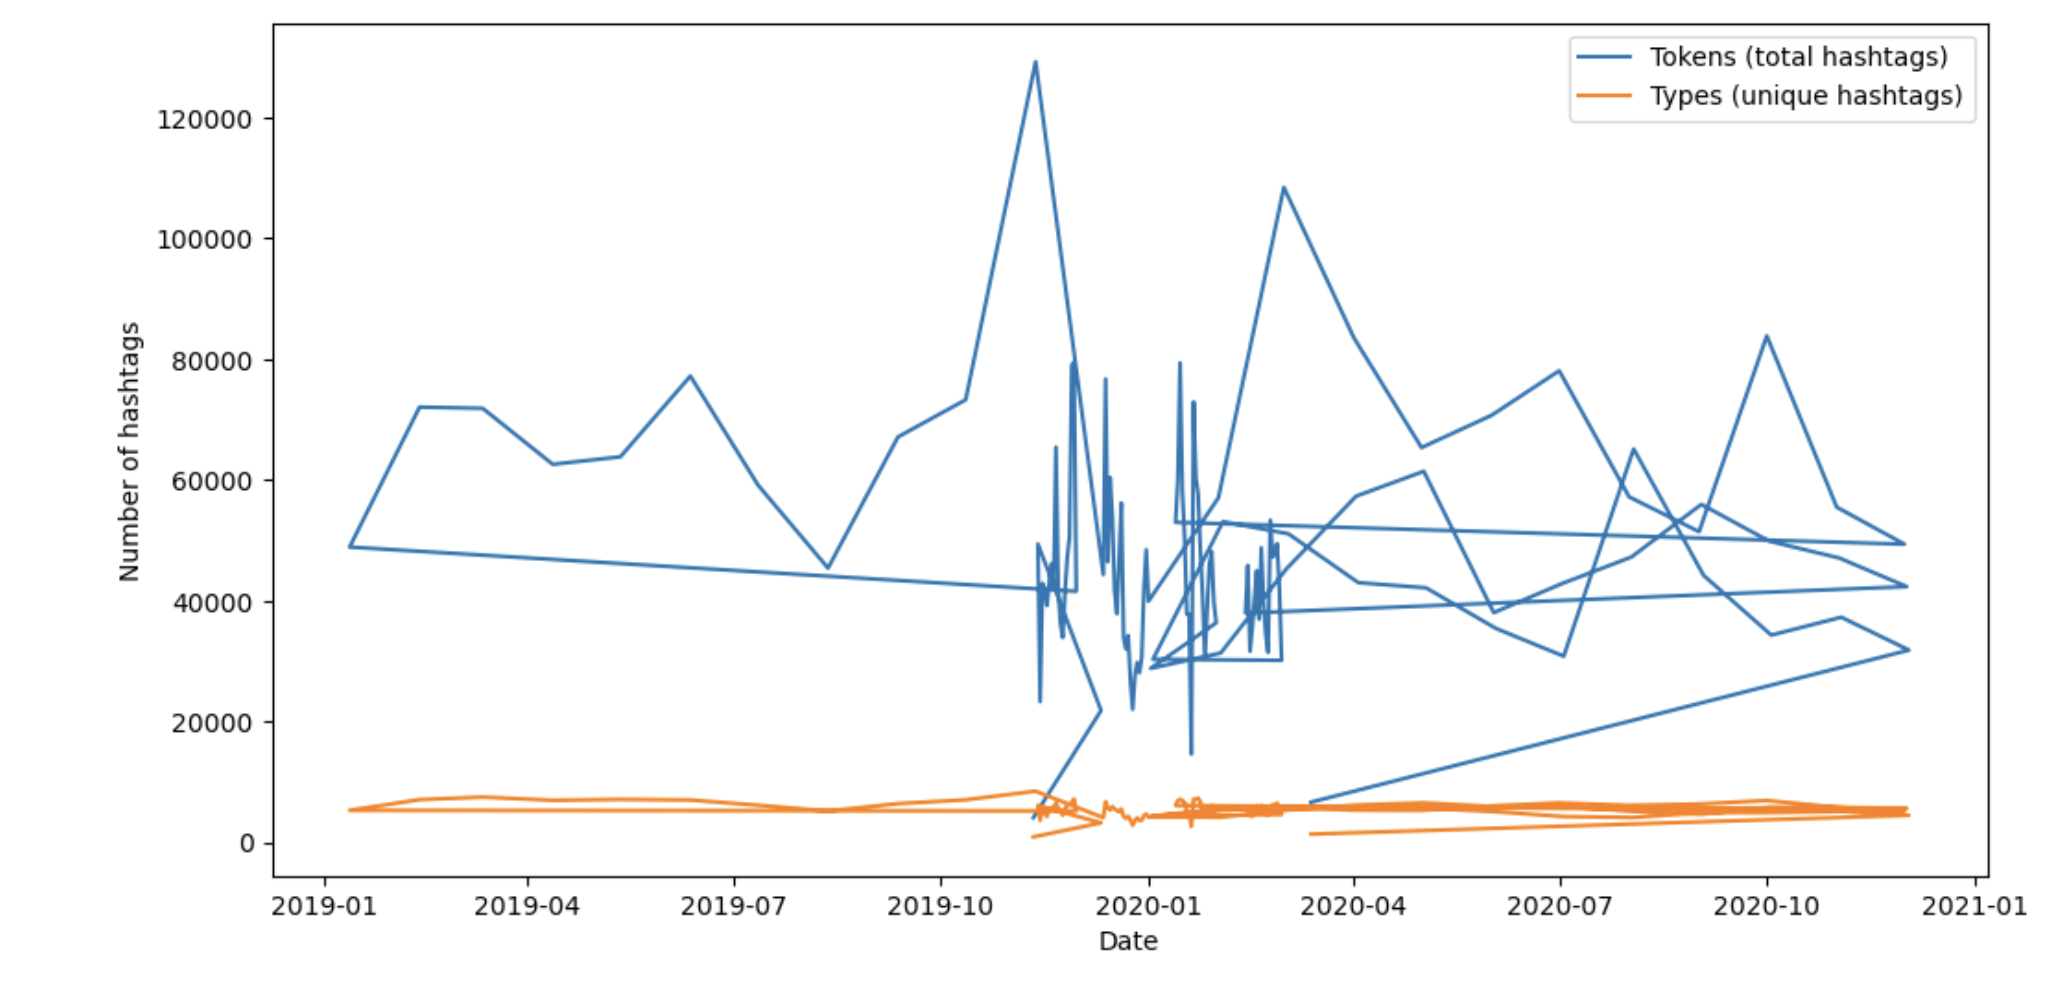

The plot from the real data shows that the total number of hashtags used (tokens) and the number of unique hashtags (types) both have fluctuations over time, with some peaks possibly related to specific events or trending topics. Comparing the real data plot to the output from the simulation, we see that the model does not capture the complex  dynamics observed in the real data. The simulation simply shows an increase in the number of unique messages in the network over time:

The model assumes a fixed number of users and a simple preferential attachment process, which may not accurately represent the growth and connectivity patterns of real-world social networks.
The model uses a single parameter (μ) to determine the probability of content generation and retweeting, which may be too simplistic to capture the diverse ways in which users engage with content on social media platforms.
The model does not account for the influence of external factors, such as trending topics, which can drive significant changes in user behavior and hashtag use.